<a href="https://colab.research.google.com/github/shihabmohammed8/DL-01/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import kagglehub
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

In [26]:
path = kagglehub.dataset_download("samuelcortinhas/cats-and-dogs-image-classification")
print("Dataset downloaded to:", path)

train_dir = os.path.join(path, "train")
test_dir  = os.path.join(path, "test")

Using Colab cache for faster access to the 'cats-and-dogs-image-classification' dataset.
Dataset downloaded to: /kaggle/input/cats-and-dogs-image-classification


In [27]:
IMG_SIZE = 150
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 447 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


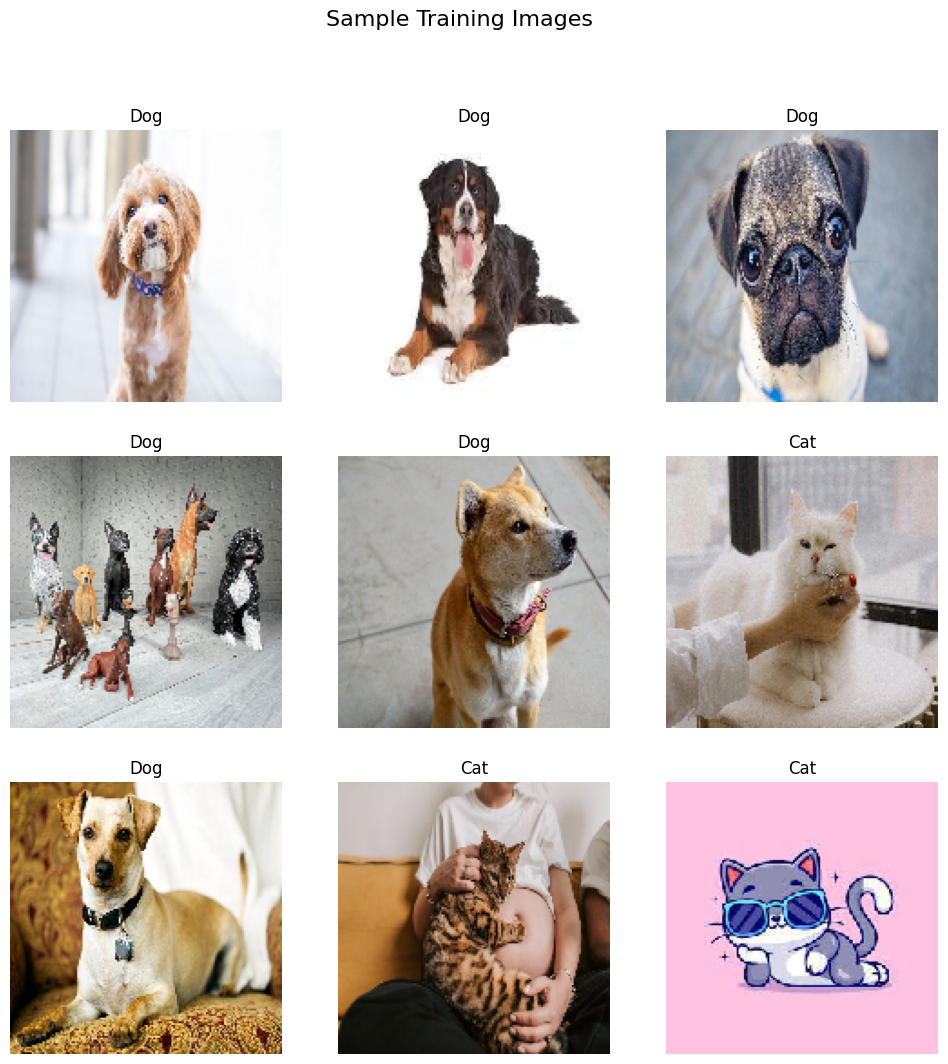

In [36]:
images, labels = next(train_data)
class_names = {0: 'Cat', 1: 'Dog'}

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[labels[i].astype(int)])
    plt.axis('off')
plt.suptitle('Sample Training Images', fontsize=16)
plt.show()

In [31]:

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(train_data, validation_data=val_data, epochs=10)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.4405 - loss: 1.5172 - val_accuracy: 0.5000 - val_loss: 0.6856
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5489 - loss: 0.6854 - val_accuracy: 0.5182 - val_loss: 0.6775
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.5520 - loss: 0.6886 - val_accuracy: 0.5000 - val_loss: 0.6860
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.5672 - loss: 0.6671 - val_accuracy: 0.5091 - val_loss: 0.6901
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.5680 - loss: 0.6746 - val_accuracy: 0.6273 - val_loss: 0.6446
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.6143 - loss: 0.6263 - val_accuracy: 0.6636 - val_loss: 0.6509
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.7441 - loss: 0.6062 - val_accuracy: 0.6545 - val_loss: 0.6458
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.7813 - loss: 0.5234 - val_accuracy: 0.5818 - val_loss:

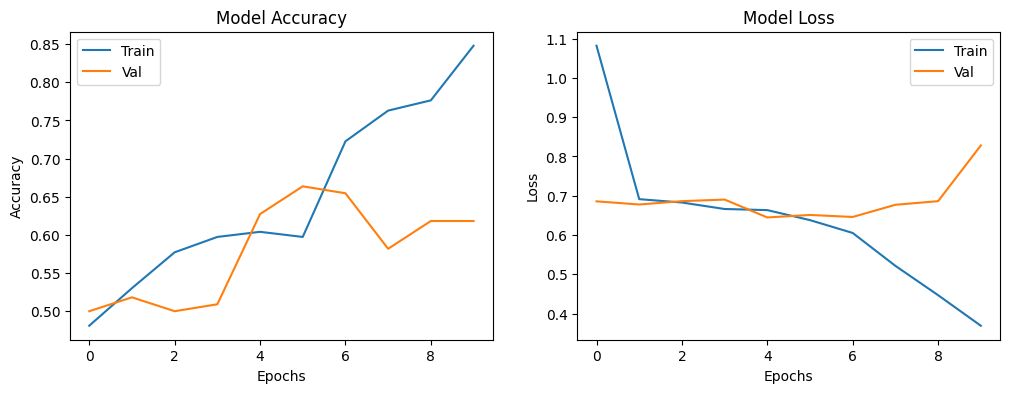

In [33]:

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Val"])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Val"])
plt.show()

In [35]:
import numpy as np
from tensorflow.keras.preprocessing import image
cats_images = os.listdir(os.path.join(test_dir, "cats"))

if cats_images:
    test_image_path = os.path.join(test_dir, "cats", cats_images[4])
else:
    print("No cat images found in the test directory.")
    test_image_path = None

if test_image_path:
    img = image.load_img(test_image_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    img_show = image.load_img(test_image_path)

    prediction = model.predict(img_array)

    if prediction[0][0] > 0.5:
        print("Prediction: Dog")
    else:
        print("Prediction: Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Prediction: Cat
